In [20]:
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd
from shapely import Point

In [79]:
paleo = pd.read_excel('../../../../Downloads/1-s2.0-S0012825223002362-mmc2.xlsx',
                      header=[2])

paleo['geometry'] = paleo.apply(lambda row: Point(row['Rlon'], row['Rlat']) ,axis=1)
paleo = gpd.GeoDataFrame(paleo, crs=4326)


In [80]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\s1759665\AppData\Local\Temp\ipykernel_20208\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


(-5000000.0, 10000000.0)

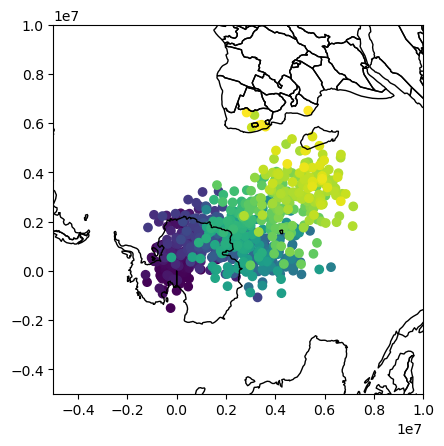

In [82]:
paleo = paleo.set_index(paleo['age'].astype('timedelta64[s]'))
# resampled = paleo[['Rlon','Rlat']].resample('20s').mean()


# resampled['geometry'] = resampled.apply(lambda row: Point(row['Rlon'], row['Rlat']), axis=1)
# resampled = gpd.GeoDataFrame(resampled, crs=4326)

# resampled = resampled.reset_index()
# resampled['age (Ma)'] = resampled['age'].apply(lambda s: s.total_seconds())

# ax = resampled.to_crs(spole_crs).plot(column='age (Ma)')
ax = paleo.to_crs(spole_crs).plot(column='age')
world.to_crs(spole_crs).plot(fc='none', ec='k', ax=ax)
ax.set_xlim(-0.5e7, 1e7)
ax.set_ylim(-0.5e7, 1e7)

KeyError: 'age (Ma)'

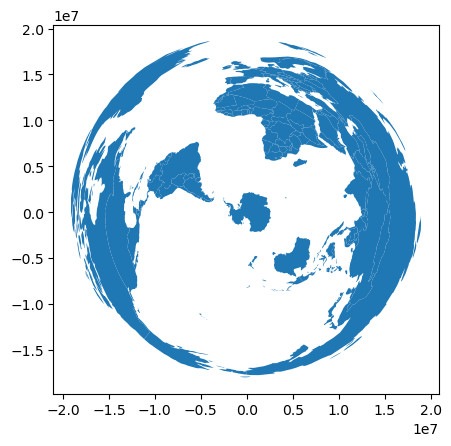

In [55]:
spole_crs = ccrs.AzimuthalEquidistant(central_longitude=0, central_latitude=-90)

ax = world.to_crs(spole_crs).plot()
paleo.to_crs(spole_crs).plot(column='age',ax=ax)